<h1 style="text-align:center">Deep Learning  Lab Session </h1>
<h1 style="text-align:center">First Lab Session - 3 Hours </h1>
<h1 style="text-align:center">Artificial Neural Networks for Handwritten Digits Recognition</h1>

<b> Student 1:</b> Collura  
<b> Student 2:</b> Spano
 
 
The aim of this session is to practice with Artificial Neural Networks. Answers and experiments should be made by groups of one or two students. Each group should fill and run appropriate notebook cells. 

To generate your final report, use print as PDF (Ctrl+P). Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed by April 7th 2017. 

# Introduction


In this session, your will implement, train and test a Neural Network
for the Handwritten Digits Recognition problem <a href="http://yann.lecun.com/exdb/mnist/"> [1] </a> with  different settings of hyper parameters. You will use the MNIST dataset which was constructed from a number of scanned document dataset available from the National Institute of Standards and Technology (NIST). Images of digits were taken from a variety of scanned documents, normalized in size and centered. 


<img src="Nimages/mnist.png",width="350" height="500" align="center">
<center><span>Figure 1: MNIST digits examples</span></center>


This assignment includes a written part of programms to help you understand how to build and train
your neural net and then to test your code and get results. 

1. <a href="NeuralNetwork.py"> NeuralNetwork.py </a> 
2. <a href="transfer_functions.py"> transfer_functions.py </a> 
3.  <a href="utils.py "> utils.py </a> 


Functions defined inside the python files mentionned above can be imported  using the python command : 
from filename import *

You will use the following libraries:

1. <a href="http://cs231n.github.io/python-numpy-tutorial/"> numpy </a>: for creating arrays and using methods to manipulate arrays.

2. <a href="http://matplotlib.org/"> matplotlib  </a>: for making plots
 








# Section 1 :  My First Neural Network

<b>Part 1</b>: Before designing and writing your code, you will first work on a neural network by hand. 
Consider the above Neural network with two inputs $X=(x1,x2)$, one hidden layers and a single output unit $(y)$.
The initial weights are set to random values. Neurons 6 and 7 represent the bias. Bias values are equal to 1.  
Training sample, X = (0.8, 0.2), whose class label is Y=0.4.

Assume that the neurons have a Sigmoid activation function  $f(x)=\frac{1}{(1+e^{-x})}$ and the learning rate $\mu$=1


<img src="Nimages/NN.png", width="700" height="900"> 
<center><span>Figure 2: Neural network </span></center>


<b>Question 1.1.1</b>: Compute the new values of weights $w_{i,j}$ after a forward pass and a backward pass.
$w_{i,j}$ is the weight of the connexion between neuron $i$ and neuron $j$.

$u_3^{(1)} = 0.8 \cdot 0.3 + 0.2 \cdot 0.8 + 1 \cdot 0.2 = 0.6$

$u_4^{(1)} = 0.8 \cdot -0.5 + 0.2 \cdot 0.2 + 1 \cdot -0.4 = -0.76$

$o_3^{(1)} = sig(u_3^{(1)}) = 0.6456$

$o_4^{(1)} = sig(u_4^{(1)}) = 0.3186$

$u_5^{(2)} = 0.6456 \cdot -0.6 + 0.3186 \cdot 0.4 + 1 \cdot 0.5 = 0.2400$

$o_5^{(2)} = sig(u_5^{(2)}) = 0.559 = y$

$E = \frac{1}{2} \sum_k (y_k - t_k)^2 = \frac{1}{2} (0.59 - 0.4)^2 = 0.019$


$w_{1,3}= 0.3 - \mu [(0.59-0.4)\cdot 0.59 \cdot (1-0.59) \cdot -0.6] \cdot 0.64 \cdot (1-0.64) \cdot 0.8 = 0.3043$ 

$w_{1,4}= -0.5 - \mu [(0.59-0.4)\cdot 0.59 \cdot (1-0.59) \cdot 0.4] \cdot 0.32 \cdot (1-0.32) \cdot 0.8 = -0.5027$

$w_{2,3}= 0.8 - \mu [(0.59-0.4)\cdot 0.59 \cdot (1-0.59) \cdot -0.6] \cdot 0.64 \cdot (1-0.64) \cdot 0.2 = 0.8011$

$w_{2,4}= 0.2 - \mu [(0.59-0.4)\cdot 0.59 \cdot (1-0.59) \cdot 0.4] \cdot 0.32 \cdot (1-0.32) \cdot 0.2 = 0.1993$

$w_{6,3}= 0.2 - \mu [(0.59-0.4)\cdot 0.59 \cdot (1-0.59) \cdot -0.6] \cdot 0.64 \cdot (1-0.64) \cdot 1 = 0.2054$

$w_{6,4}= -0.4 - \mu [(0.59-0.4)\cdot 0.59 \cdot (1-0.59) \cdot 0.4] \cdot 0.32 \cdot (1-0.32) \cdot 1 = -0.4034$

$w_{3,5}= -0.6 - \mu \cdot (0.59-0.4)\cdot 0.59 \cdot (1-0.59)\cdot 0.64 = -0.6254$

$w_{4,5}= 0.4 - \mu \cdot (0.59-0.4)\cdot 0.59 \cdot (1-0.59)\cdot 0.32 = 0.3874$

$w_{7,5}= 0.5 - \mu \cdot (0.59-0.4)\cdot 0.59 \cdot (1-0.59)\cdot 1 = 0.4606$

<b>Part 2</b>: Neural Network Implementation

Please read all source files carefully and understand the data structures and all functions.
You are to complete the missing code. 
First you should define the neural network (using the NeuralNetwork class, see in the <a href="NeuralNetwork.py"> NeuralNetwork.py </a> file) and reinitialise weights. 
Then you will to complete the Feed Forward and the Back-propagation functions. 

<b>Question 1.2.1</b>: Define the neural network corresponding to the one in part 1

In [3]:
from __future__ import print_function
from __future__ import division
import os
from scipy import misc
import matplotlib.pyplot as plt
from NeuralNetwork import *


#c reate the network
my_first_net = NeuralNetwork(2, 2, 1, iterations=10, learning_rate=1)

if not os.path.exists('models'):
    os.makedirs('models')

In [2]:
# Data preparation 
X = np.array([0.8, 0.2])
Y = np.array([0.4])
data = []
data.append(X)
data.append(Y)

# initialize weights
wi = np.array([[0.3, -0.5], [0.8, 0.2], [0.2, -0.4]])
wo = np.array([[-0.6], [0.4], [0.5]])
my_first_net.weights_initialisation(wi, wo)

print("Weight input to hidden\n", my_first_net.W_input_to_hidden)
print("Weight hidden to output\n", my_first_net.W_hidden_to_output)

Weight input to hidden
 [[ 0.3 -0.5]
 [ 0.8  0.2]
 [ 0.2 -0.4]]
Weight hidden to output
 [[-0.6]
 [ 0.4]
 [ 0.5]]


<b>Question 1.2.2</b>: Implement the Feed Forward function (`feed_forward(X)` in the `NeuralNetwork.py` file)

`self.tfunction` and `self.dtfunction` are given as parameters to `NeuralNetwork` constructor, by default, `tfunction` and `dtfunction` are equal to `sigmoid` and `dsigmoid`.
```python
def feed_forward(self, inputs):
    # Compute input activations
    self.a_input = np.array(inputs)
    if self.a_input.size < self.input:
        self.a_input = np.append(self.a_input, 1)
    self.a_input = np.atleast_2d(self.a_input)

    # Compute hidden activations
    self.a_hidden = self.a_input.dot(self.W_input_to_hidden)
    self.o_hidden = self.tfunction(self.a_hidden)
    if len(self.o_hidden) < self.hidden:
        self.o_hidden = np.append(self.o_hidden, 1)
    self.o_hidden = np.atleast_2d(self.o_hidden)

    # Compute output activations
    self.a_output = self.o_hidden.dot(self.W_hidden_to_output)
    self.output = self.tfunction(self.a_output)
    return self.output
```

Check your network outputs the expected value (the one you computed in question 1.1)

In [3]:
# test my Feed Forward function 
output_activation = my_first_net.feed_forward(X)

print('Output activation =', output_activation)

Output activation = [[ 0.5597296]]


<div class='alert alert-success'>
0.559 is exactly what we were expecting to obtain, as it matches our computations in question 1.1: $o_5^{(2)} = sig(u_5^{(2)}) = 0.559 = y$
</div>

<b>Question 1.2.3</b>: Implement the Back-propagation Algorithm (`back_propagate(Y)` in the `NeuralNetwork.py` file)  

```python
def back_propagate(self, targets):
    # Calculate error terms for output
    dEdu2 = np.multiply(self.output - targets, self.dtfunction(self.output))
    dEdu2 = np.atleast_2d(dEdu2)

    # Calculate error terms for hidden
    dEdu1 = np.multiply(dEdu2.dot(self.W_hidden_to_output.T), self.dtfunction(self.o_hidden))
    dEdu1 = np.atleast_2d(np.delete(dEdu1, -1))

    # Update output weights
    self.W_hidden_to_output -= self.learning_rate * (dEdu2.T.dot(self.o_hidden)).T

    # Update input weights
    self.W_input_to_hidden -= self.learning_rate * (dEdu1.T.dot(self.a_input)).T

    # Calculate error
    return 0.5 * np.sum((self.output - targets)**2)
```

Check the gradient values and weight updates are correct (similar to the ones you computed in question 1.1)

In [4]:
# Test back-propagation function
err = my_first_net.back_propagate(Y)

# Print weights after back-propagation
print('w_input_to_hidden_new =\n', my_first_net.W_input_to_hidden)
print('w_hidden_to_output_new =\n', my_first_net.W_hidden_to_output)

print('Error =', err)

w_input_to_hidden_new =
 [[ 0.30432265 -0.50273473]
 [ 0.80108066  0.19931632]
 [ 0.20540332 -0.40341841]]
w_hidden_to_output_new =
 [[-0.62541468]
 [ 0.38745727]
 [ 0.46063746]]
Error = 0.0127567724159


<div class='alert alert-success'>
The weight values we obtained correspond to the ones we were expecting, as can be noticed from the output of question 1.2.1
</div>

Your Feed Forward and Back-Propagation implementations are working, Great!! Let's tackle a real world problem.

# Section 2 : The MNIST Challenge! 

<b>Data Preparation</b>

The MNIST dataset consists of handwritten digit images it contains 60,000 examples for the training set and 10,000 examples for testing. In this Lab Session, the official training set of 60,000 is divided into an actual training set of 50,000 examples, 10,000 validation examples and 10,000 examples for test. All digit images have been size-normalized and centered in a fixed size image of 28 x 28 pixels. The images are stored in byte form you will use the NumPy python library to read the data files into NumPy arrays that we will use to train the ANN.

The MNIST dataset is available in the Data folder.
To get the training, testing and validation data, run the the load_data() function.


In [5]:
from utils import *
training_data, validation_data, test_data = load_data()

Loading MNIST data .....
Done.


<b>MNIST Dataset Digits Visualisation</b>

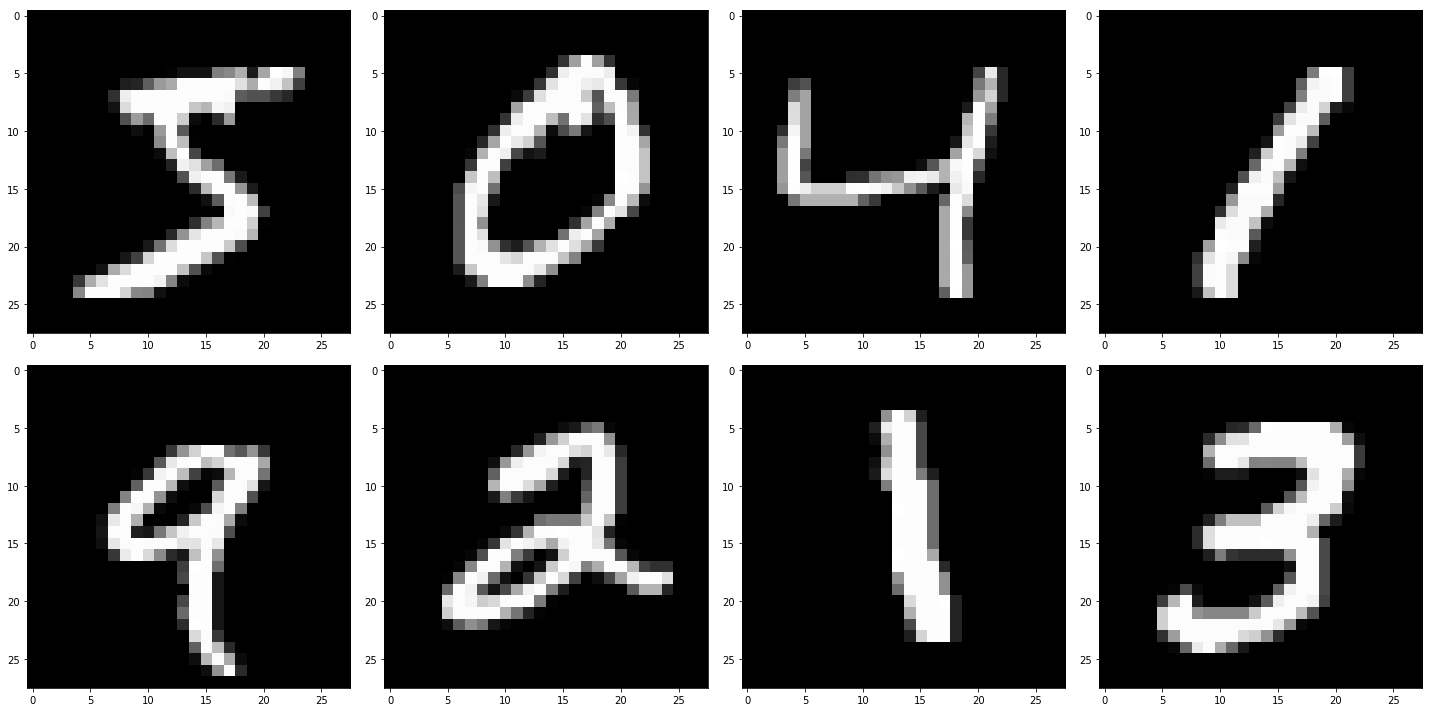

In [6]:
fig = plt.figure(figsize=(20, 10))
plt.axis('off')  # do not show axis value

ROW = 2
COLUMN = 4
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    image = training_data[i][0].reshape(28, 28)   
    plt.subplot(ROW, COLUMN, i+1)
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.

plt.tight_layout()   # automatic padding between subplots
plt.show()

<b>Part 1</b>: Creating the Neural Networks

The input layer of the neural network contains neurons encoding the values of the input pixels. The training data for the network will consist of many 28 by 28 pixel images of scanned handwritten digits, and so the input layer contains 784=28×28 neurons. The second layer of the network is a hidden layer, we set the neuron number in the hidden layer to 30. The output layer contains 10 neurons. 

<b>Question 2.1.1</b>: Create the network described above using the NeuralNetwork class

In [12]:
# Create the network
iterations = 10
learning_rate = 0.1
my_mnist_net = NeuralNetwork(784, 30, 10, iterations = iterations, learning_rate = learning_rate)

<b>Question 2.1.2</b>: Add the information about the performance of the neural network on the test set at each epoch

In [13]:
test_accuracy = my_mnist_net.predict(test_data) / 100
print('Test_Accuracy  %-2.2f' % test_accuracy)

Test_Accuracy  8.27


<b>Question 2.1.3</b>: Train the Neural Network and comment your findings

[ 1/10] Error: 0.16301	Training Acc.: 88.01	Validation Acc.: 88.48	Time: 18.85
[ 2/10] Error: 0.09030	Training Acc.: 90.53	Validation Acc.: 90.74	Time: 36.15
[ 3/10] Error: 0.07501	Training Acc.: 91.83	Validation Acc.: 91.54	Time: 53.57
[ 4/10] Error: 0.06679	Training Acc.: 92.72	Validation Acc.: 92.25	Time: 71.24
[ 5/10] Error: 0.06121	Training Acc.: 93.13	Validation Acc.: 92.71	Time: 88.70
[ 6/10] Error: 0.05709	Training Acc.: 93.69	Validation Acc.: 92.97	Time: 106.12
[ 7/10] Error: 0.05385	Training Acc.: 93.96	Validation Acc.: 93.22	Time: 123.54
[ 8/10] Error: 0.05115	Training Acc.: 94.19	Validation Acc.: 93.44	Time: 140.98
[ 9/10] Error: 0.04894	Training Acc.: 94.45	Validation Acc.: 93.56	Time: 158.26
[10/10] Error: 0.04707	Training Acc.: 94.64	Validation Acc.: 93.92	Time: 175.68


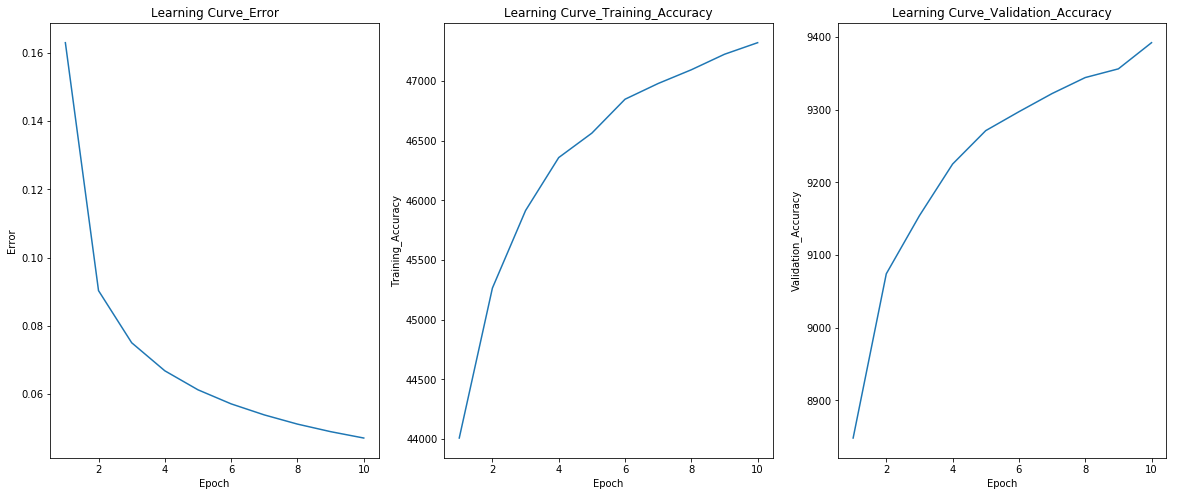

In [14]:
# Train your network 
my_mnist_net.train(training_data, validation_data)

# Save your model in models/ using a distinguishing name for your model (architecture, learning rate, etc...)
my_mnist_net.save("models/" + "architecture_mnist_net__learning_rate_" + str(learning_rate) + "__iterations_" + str(iterations))

<div class='alert alert-success'>
As expected, as the number of iterations increases, the network is able to perform better, both in terms of Training accuracy and Validation accuracy. At the same time, we can see how the error keeps decreasing stadily. We can now compare the results we obtained earlier on the test set with the ones after the training.
</div>

In [15]:
test_accuracy = my_mnist_net.predict(test_data) / 100
print('Test_Accuracy  %-2.2f' % test_accuracy)

Test_Accuracy  93.91


<b>Question 2.1.4</b>: Guess digit, Implement and test a python function that predict the class of a digit (the folder images_test contains some examples of images of digits)


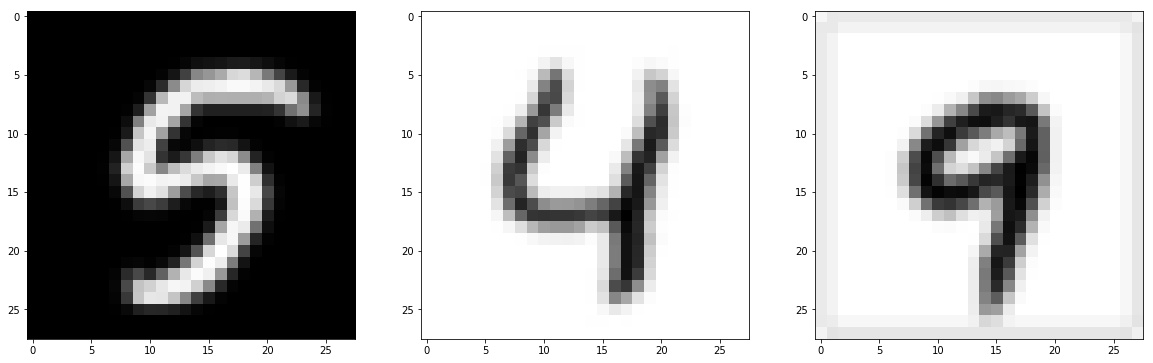

In [18]:
directory = './Images_test'

images = {}

fig = plt.figure(figsize=(20, 10))
count = 0
for image in os.listdir(directory):
    im = misc.imread(os.path.join(directory, image), True).astype(np.float32)
    im = misc.imresize(im, (28, 28))
    plt.subplot(1, 3, count + 1)
    plt.imshow(im, cmap='gray')
    
    images[image] = im
    count += 1

plt.show()

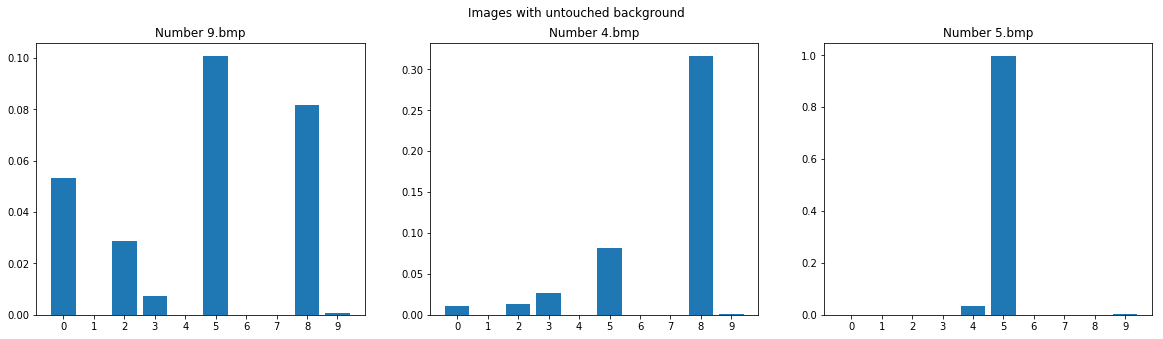

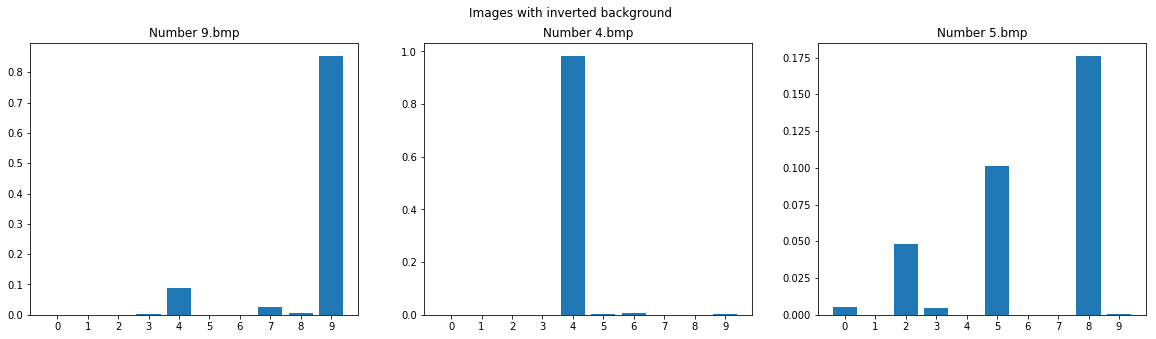

In [27]:
fig = plt.figure(figsize=(20, 5))

# with normal background
count = 0
for number in images.keys():
    # print(image.flatten())
    result = my_mnist_net.feed_forward(images[number].flatten() / 255.0)
    plt.subplot(1, 3, count + 1)
    plt.title('Number %s' % number)
    plt.bar(np.arange(0, 10), result.flatten())
    plt.xticks(np.arange(0, 10))
    count += 1
    
fig.suptitle('Images with untouched background')
plt.show()

fig = plt.figure(figsize=(20, 5))
# with inverted background
count = 0
for number in images:
    # print(image.flatten())
    result = my_mnist_net.feed_forward(1 - (images[number].flatten() / 255.0))
    plt.subplot(1, 3, count + 1)
    plt.title('Number %s' % number)
    plt.bar(np.arange(0, 10), result.flatten())
    plt.xticks(np.arange(0, 10))
    count += 1

fig.suptitle('Images with inverted background')
plt.show()

<div class='alert alert-success'>
As we can see from the graphs above, whenever the image has a dark background our model is able to correctly predict the right number. However, it performs poorly in case of numbers on a white background. For this reason we plotted the results both for normal background (where we correctly identified '5') and for the inverted one (where we correctly identified '9' and '4'), showing how we are able to positively identify all the digits with a certainty value of more then 90% everytime.
</div>

<b>Part 2</b>: Change the neural network structure and parameters to optimize performance

<b> Question 2.2.1</b>: Change the learning rate (0.001, 0.1, 1.0 , 10). Train the new neural nets with the original specifications (Part 2.1), for 50 iterations. 
Plot test accuracy vs iteration for each learning rate on the same graph. Report the maximum
test accuracy achieved for each learning rate. Which one achieves the maximum test accuracy?

Learning rate: 0.001
[ 1/50] Error: 0.48944	Training Acc.: 38.90	Validation Acc.: 39.72	Time: 24.97
[11/50] Error: 0.24776	Training Acc.: 70.96	Validation Acc.: 71.71	Time: 210.41
[21/50] Error: 0.18916	Training Acc.: 78.04	Validation Acc.: 79.10	Time: 401.67
[31/50] Error: 0.15986	Training Acc.: 81.55	Validation Acc.: 82.17	Time: 588.40
[41/50] Error: 0.14101	Training Acc.: 83.72	Validation Acc.: 84.19	Time: 775.56
[50/50] Error: 0.12893	Training Acc.: 85.07	Validation Acc.: 85.44	Time: 943.38


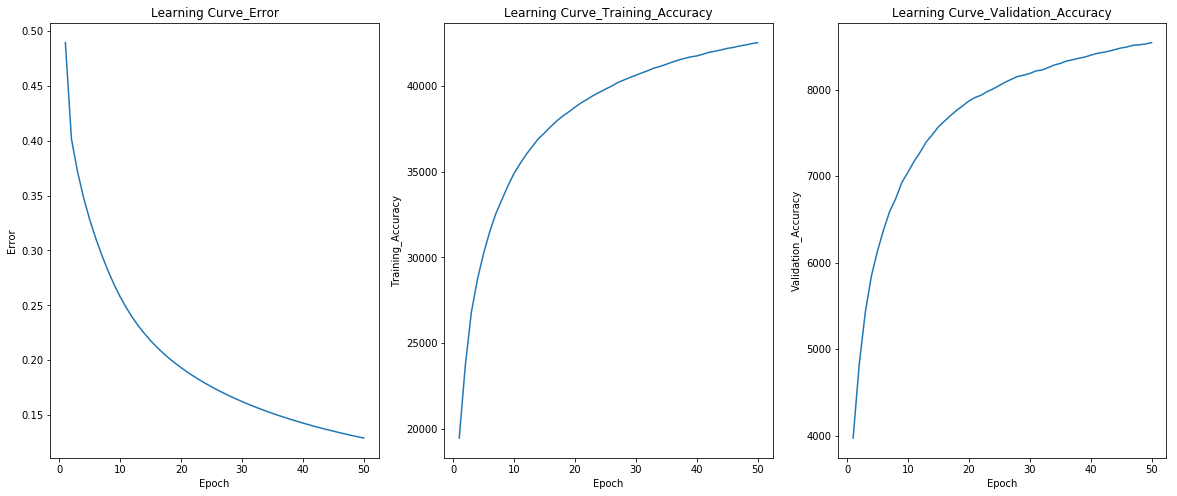

Learning rate: 0.1
[ 1/50] Error: 0.15960	Training Acc.: 87.63	Validation Acc.: 88.34	Time: 22.84
[11/50] Error: 0.04398	Training Acc.: 95.20	Validation Acc.: 93.81	Time: 209.24
[21/50] Error: 0.03380	Training Acc.: 96.31	Validation Acc.: 94.61	Time: 393.31
[31/50] Error: 0.02887	Training Acc.: 96.78	Validation Acc.: 94.82	Time: 576.29
[41/50] Error: 0.02564	Training Acc.: 97.03	Validation Acc.: 94.76	Time: 761.29
[50/50] Error: 0.02334	Training Acc.: 97.29	Validation Acc.: 94.85	Time: 932.00


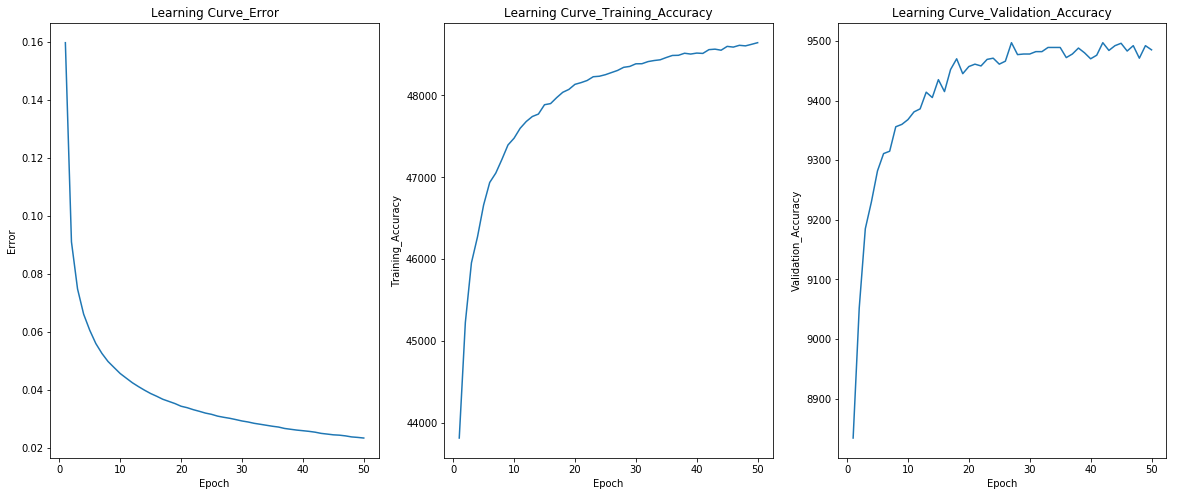

Learning rate: 1.0
[ 1/50] Error: 0.10777	Training Acc.: 91.26	Validation Acc.: 91.56	Time: 22.86
[11/50] Error: 0.04646	Training Acc.: 94.65	Validation Acc.: 94.26	Time: 206.78
[21/50] Error: 0.03850	Training Acc.: 95.76	Validation Acc.: 94.93	Time: 391.63
[31/50] Error: 0.03617	Training Acc.: 95.61	Validation Acc.: 94.57	Time: 575.00
[41/50] Error: 0.03370	Training Acc.: 96.40	Validation Acc.: 95.14	Time: 760.86
[50/50] Error: 0.03101	Training Acc.: 96.56	Validation Acc.: 95.07	Time: 930.90


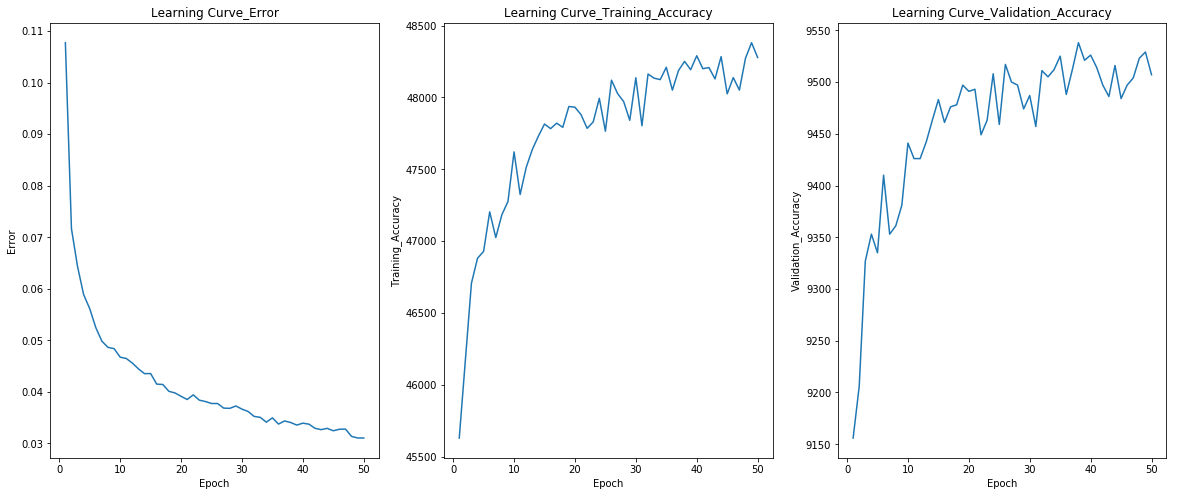

Learning rate: 10.0
[ 1/50] Error: 0.68466	Training Acc.: 14.13	Validation Acc.: 13.30	Time: 23.59
[11/50] Error: 0.49555	Training Acc.: 19.03	Validation Acc.: 19.13	Time: 211.42


transfer_functions.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


[21/50] Error: 0.50000	Training Acc.: 10.35	Validation Acc.: 10.28	Time: 397.67
[31/50] Error: 0.50000	Training Acc.: 14.18	Validation Acc.: 14.72	Time: 581.38
[41/50] Error: 0.50000	Training Acc.: 10.47	Validation Acc.: 10.39	Time: 764.48
[50/50] Error: 0.50000	Training Acc.: 15.87	Validation Acc.: 15.60	Time: 935.81


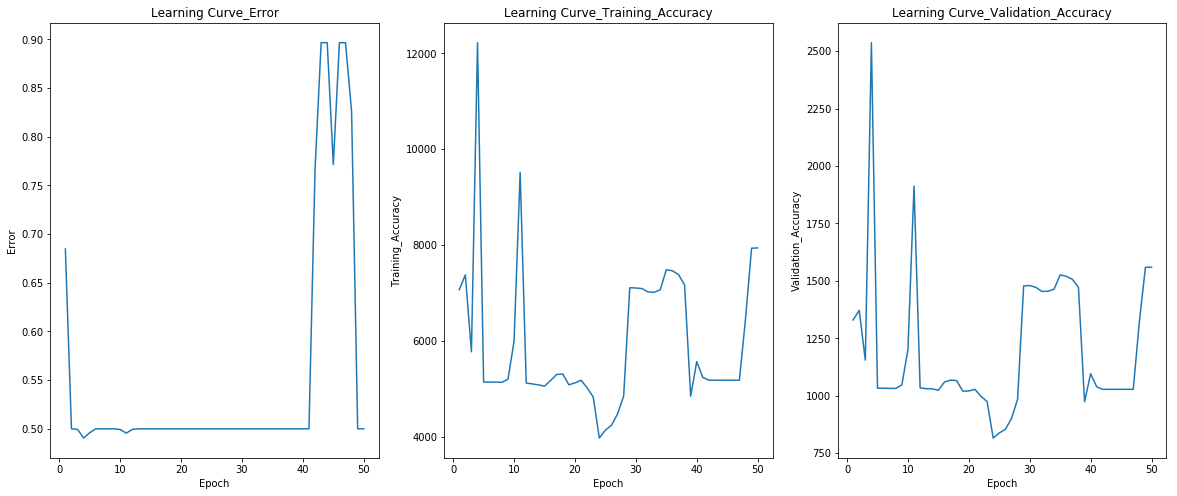

In [30]:
iterations = 50
learning_rates = np.array([0.001, 0.1, 1.0, 10])
validation_data_results = []
predictions = []

for learning_rate in learning_rates:
    my_mnist_net = NeuralNetwork(784, 30, 10, iterations = iterations, learning_rate = learning_rate)

    # Train your network
    print('Learning rate:', learning_rate)
    result = my_mnist_net.train(training_data, validation_data, print_step=10)
    validation_data_results.append(result)

    # Save your model in models/ using a distinguishing name for your model (architecture, learning rate, etc...)
    my_mnist_net.save('models/architecture_mnist_net__learning_rate_%f__iterations_%d' % (learning_rate, iterations))

    predictions.append(my_mnist_net.predict(test_data))

<div class='alert alert-success'>
<table>
<thead>
    <tr>
        <th>Learning Rate</th><th>Max Accuracy</th>
    </tr>
</thead>
<tbody>
    <tr>
    <td>0.001</td><td>85.07</td>    </tr>
    <tr><td>0.1 </td><td>97.29</td></tr>
    <tr><td>1.0 </td><td>96.56</td></tr>
    <tr><td>10  </td><td>24.00</td></tr>
</tbody>
</table>
<br>
As we can see, the best result has been reached by setting the learning rate to 0.1, followed by 1.0. The other two possible values are not performing as good, being too small and too big, and causing a very slow and a too fast learning process, respectively. We can notice that the curve is not smooth with the learning rate equal to 10, denoting that we might be taking "jumps too big" and possibly jumping over the point with the actual highest accuracy.
Note that the Max accuracy for learning rate = 10 is approximative, since we only printed every 10 iterations for computational reasons.

</div>

<div class='alert alert-success'>
The figure below shows the validation accuracy for the different learning rates.
</div>

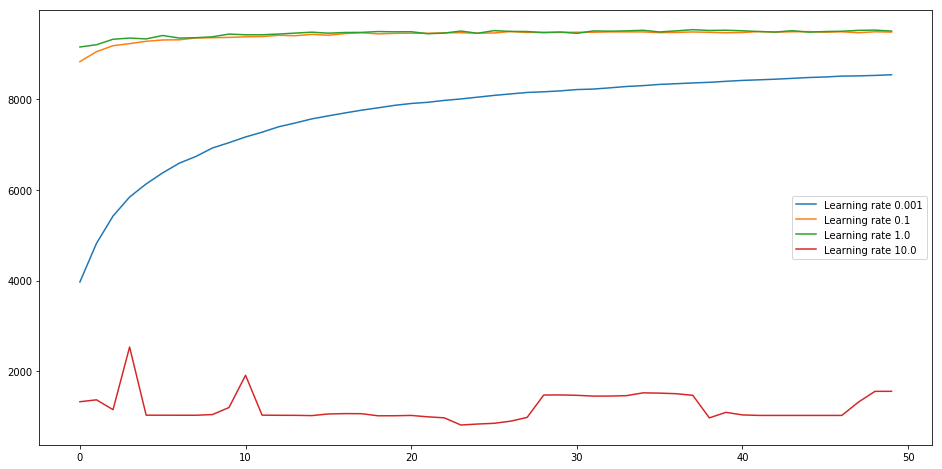

In [33]:
fig, ax = plt.subplots(figsize=(16, 8))
for validation_data_result, learning_rate in zip(validation_data_results, learning_rates):
    ax.plot(validation_data_result, label='Learning rate ' + str(learning_rate))

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

<div class='alert alert-success'>
The figure below shows the number of *test* samples correcty predicted, out of 10000 for the different learning rates
</div>

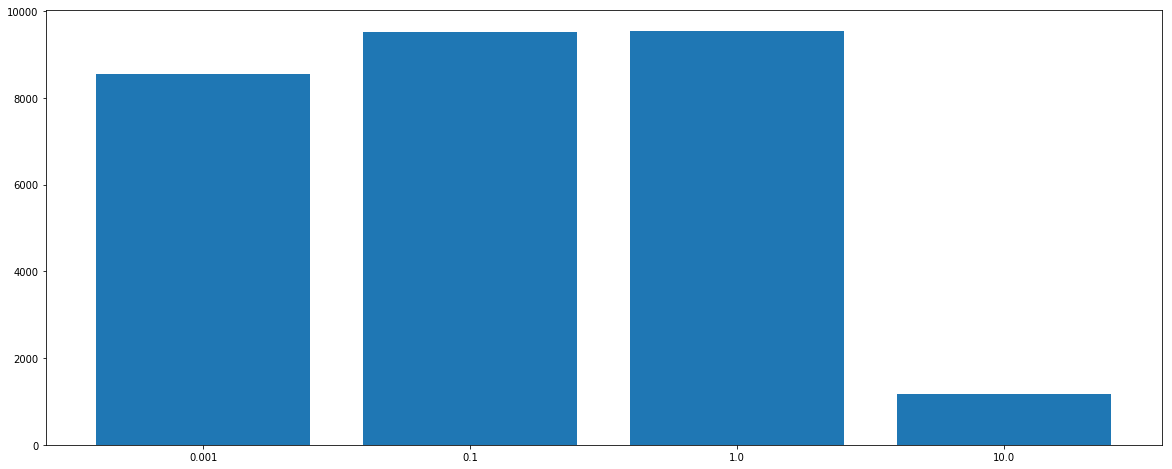

In [22]:
fig = plt.figure(figsize=(20, 8))
plt.bar(np.arange(len(learning_rates)), predictions)
plt.xticks(np.arange(len(learning_rates)), learning_rates)
plt.show()

 <b> Question 2.2.2 : </b> initialize all weights to 0.  Plot the training accuracy curve.
Comment your results
    
        

[ 1/50] Error: 0.39682	Training Acc.: 56.16	Validation Acc.: 55.91	Time: 25.60
[11/50] Error: 0.20522	Training Acc.: 72.63	Validation Acc.: 72.41	Time: 233.23
[21/50] Error: 0.20181	Training Acc.: 74.36	Validation Acc.: 73.45	Time: 441.27
[31/50] Error: 0.19916	Training Acc.: 74.16	Validation Acc.: 73.92	Time: 651.80
[41/50] Error: 0.19656	Training Acc.: 74.17	Validation Acc.: 73.06	Time: 863.24
[50/50] Error: 0.19535	Training Acc.: 74.09	Validation Acc.: 72.84	Time: 1060.08


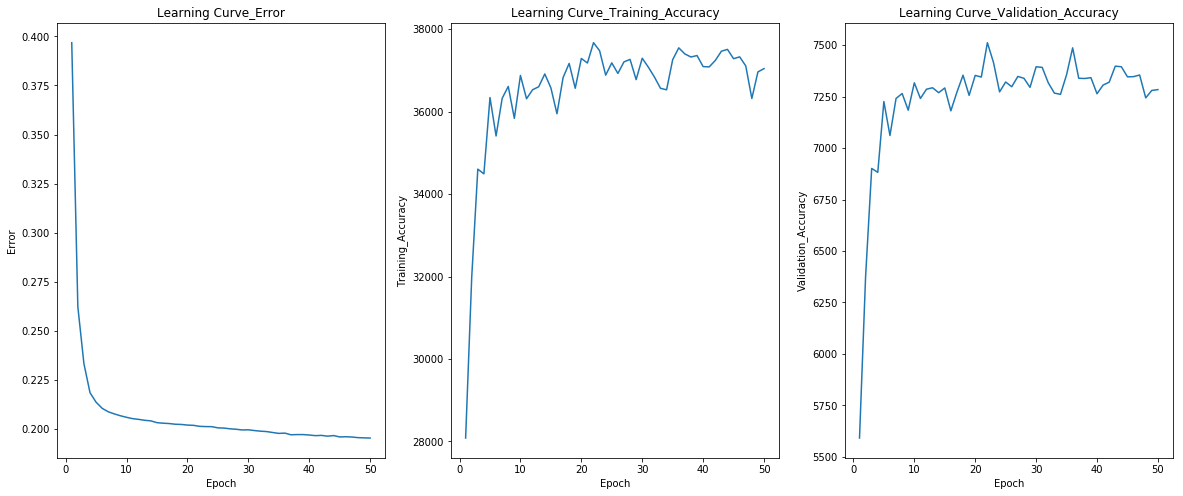

Test_Accuracy  73.59


In [27]:
iterations = 50
learning_rate = 0.1
my_mnist_net = NeuralNetwork(784, 30, 10, iterations = iterations, learning_rate = learning_rate)
my_mnist_net.weights_initialisation(np.zeros([785, 30]), np.zeros([31, 10]))

# Train your network
my_mnist_net.train(training_data, validation_data, print_step=10)

test_accuracy = my_mnist_net.predict(test_data) / 100
print('Test_Accuracy  %-2.2f' % test_accuracy)

<div class='alert alert-success'>
We kept the 50 iterations to have a better view of the whole learning process, and we chose to use a learning rate of 0.1 due to our previous results, which show that we reach the best accuracy with that value.

From the graphs we can notice how the learning kind of stopped earlier than in the other cases, and we were expecting that, since from the theory we know that the best configuration is to randomly set the weights. In fact, setting the weights to zero will lead to them behaving in the exact same way, preventing the network from learning.
</div>

<b> Question 2.2.3: </b> Try with a different transfer function (such as tanh). File transfer_functions.py provides you the python implementation of the tanh function and its derivative

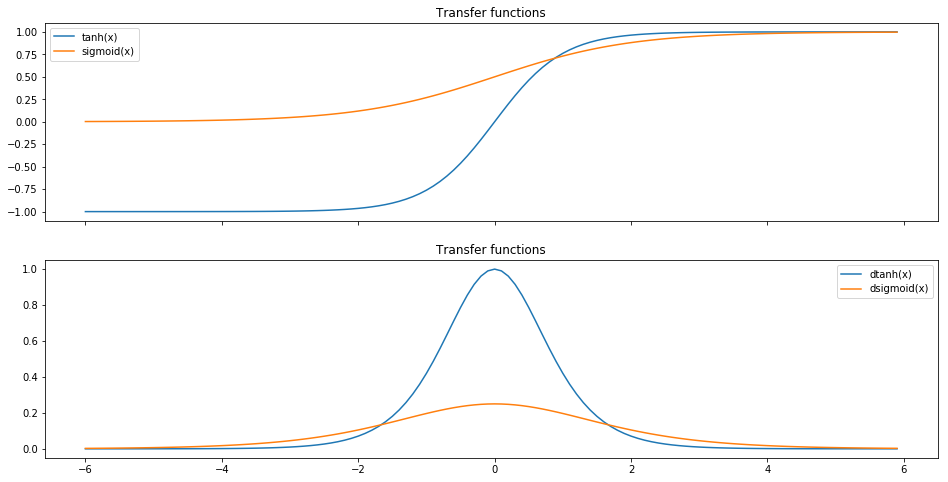

In [61]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), sharex=True)
x = np.arange(-6, 6, 0.1)
ax1.plot(x, tanh(x), label='tanh(x)')
ax1.plot(x, sigmoid(x), label='sigmoid(x)')

ax1.set_title('Transfer functions')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels)

ax2.plot(x, dtanh(tanh(x)), label='dtanh(x)')
ax2.plot(x, dsigmoid(sigmoid(x)), label='dsigmoid(x)')

ax2.set_title('Transfer functions')
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels)

plt.show()

[ 1/20] Error: 1.24083	Training Acc.: 71.15	Validation Acc.: 72.49	Time: 23.21
[ 2/20] Error: 1.05068	Training Acc.: 71.27	Validation Acc.: 71.55	Time: 47.12
[ 3/20] Error: 1.00002	Training Acc.: 78.62	Validation Acc.: 78.79	Time: 70.46
[ 4/20] Error: 0.97643	Training Acc.: 73.94	Validation Acc.: 74.51	Time: 93.82
[ 5/20] Error: 0.96425	Training Acc.: 79.08	Validation Acc.: 79.53	Time: 122.76
[ 6/20] Error: 0.95801	Training Acc.: 82.90	Validation Acc.: 83.09	Time: 166.43
[ 7/20] Error: 0.93665	Training Acc.: 75.89	Validation Acc.: 77.11	Time: 193.09
[ 8/20] Error: 0.93403	Training Acc.: 85.17	Validation Acc.: 85.14	Time: 231.23
[ 9/20] Error: 0.92407	Training Acc.: 80.18	Validation Acc.: 80.10	Time: 265.54
[10/20] Error: 0.92329	Training Acc.: 81.61	Validation Acc.: 82.48	Time: 307.57
[11/20] Error: 0.91109	Training Acc.: 82.88	Validation Acc.: 83.12	Time: 349.12
[12/20] Error: 0.91194	Training Acc.: 69.25	Validation Acc.: 69.64	Time: 392.54
[13/20] Error: 0.91045	Training Acc.: 80.64	

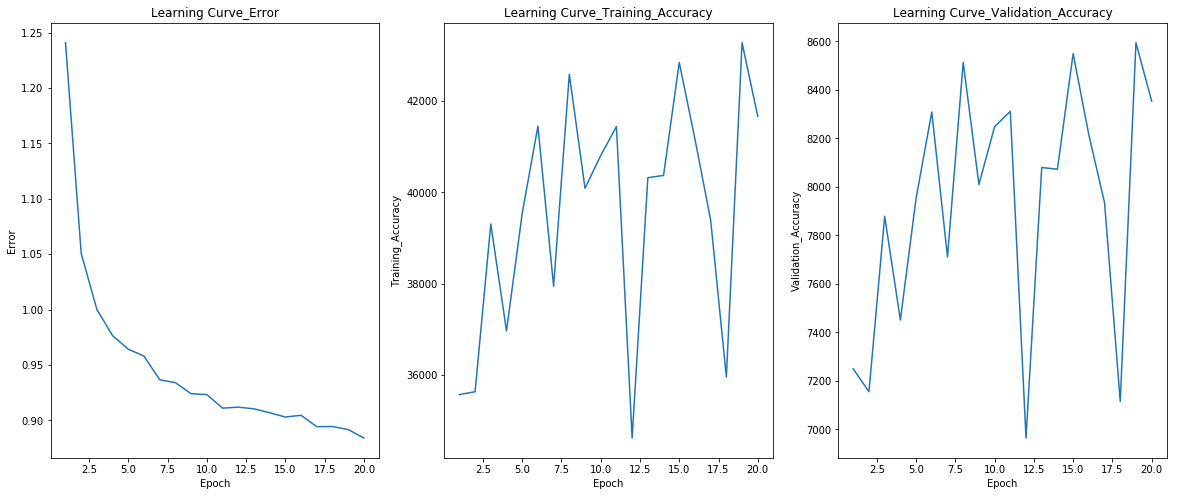

Test_Accuracy  82.79


In [62]:
my_mnist_net = NeuralNetwork(784, 30, 10, iterations = 20, learning_rate = 0.1, tfunction=tanh, dtfunction=dtanh)
my_mnist_net.train(training_data, validation_data)
test_accuracy = my_mnist_net.predict(test_data) / 100
print('Test_Accuracy  %-2.2f' % test_accuracy)

<div class='alert alert-success'>
The results appear to be much worse than what we have found with the sigmoid function. Our guess is that tanh is not the best transfer function for our data, or that the configuration we chose (10 iterations for computational reasons, 0.1 learning rate due to previous results) are not the optimal ones anymore. 
</div>


<b> Question 2.2.4 : </b>  Add more neurons in the hidden layer (try with 100, 200, 300). Plot the curve representing the validation accuracy versus the number of neurons in the hidden layer.  (Choose and justify other hyper-parameters)

Neurons hidden layers: 100
[ 1/10] Error: 0.12860	Training Acc.: 90.37	Validation Acc.: 90.88	Time: 44.51
[10/10] Error: 0.03553	Training Acc.: 96.41	Validation Acc.: 95.10	Time: 389.91


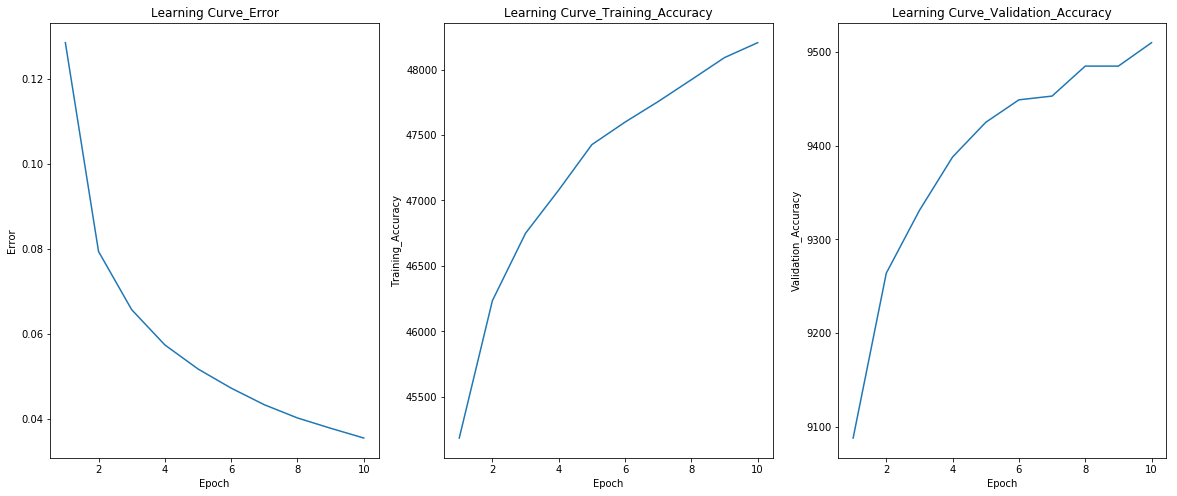

Neurons hidden layers: 200
[ 1/10] Error: 0.11669	Training Acc.: 91.40	Validation Acc.: 91.39	Time: 86.86
[10/10] Error: 0.03044	Training Acc.: 96.89	Validation Acc.: 95.17	Time: 799.16


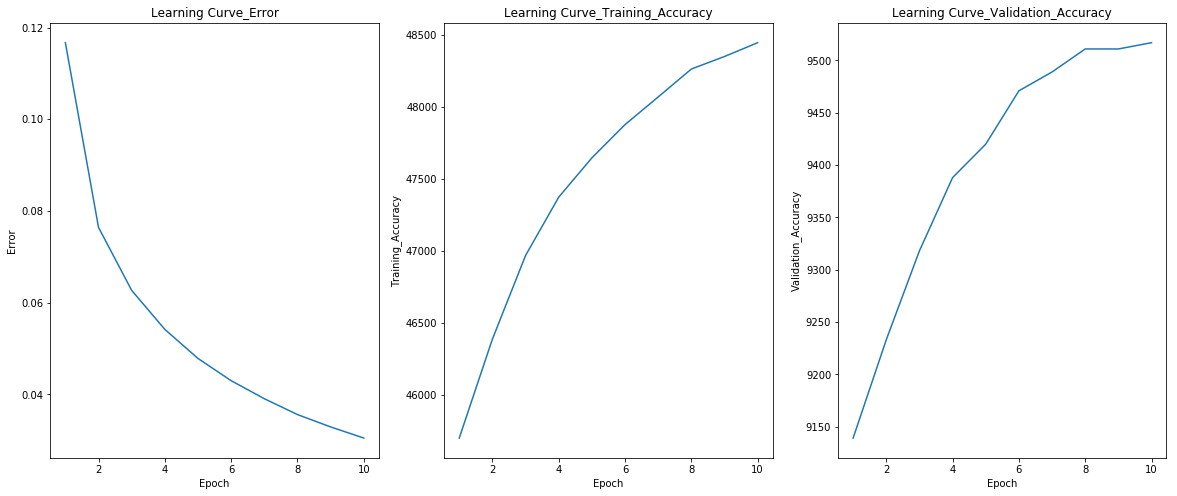

Neurons hidden layers: 300
[ 1/10] Error: 0.10776	Training Acc.: 91.66	Validation Acc.: 91.32	Time: 120.25
[10/10] Error: 0.02709	Training Acc.: 97.23	Validation Acc.: 95.31	Time: 1135.85


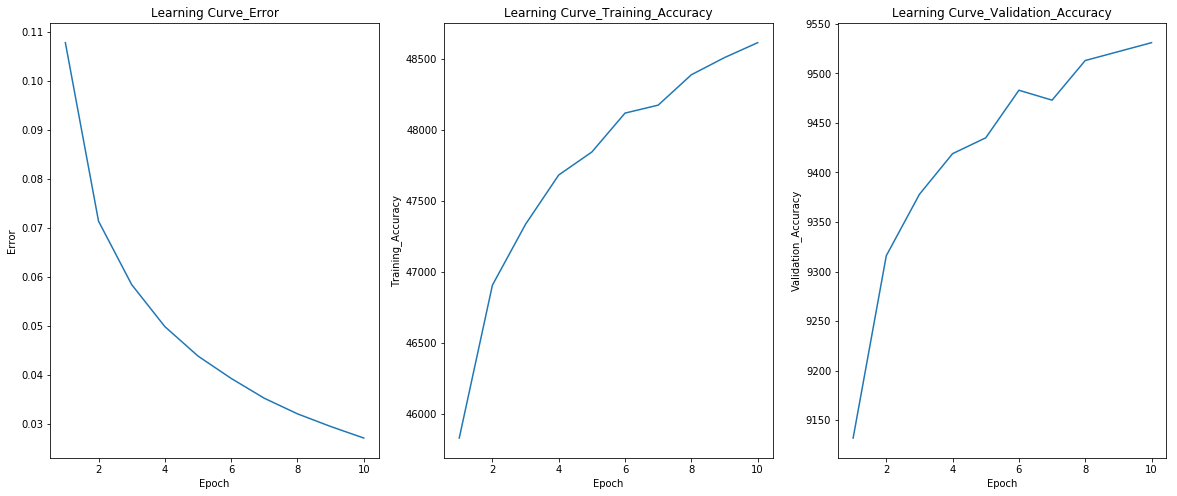

In [4]:
neurons_hidden_layers = np.array([100, 200, 300])
validation_data_results = []
predictions = []
iterations = 10
learning_rate = 0.1

for neurons_hidden_layer in neurons_hidden_layers:
    my_mnist_net = NeuralNetwork(784, neurons_hidden_layer, 10, iterations = iterations, learning_rate = learning_rate)

    # Train your network
    print('Neurons hidden layers:', neurons_hidden_layer)
    result = my_mnist_net.train(training_data, validation_data, print_step=10)
    validation_data_results.append(result)

    # Save your model in models/ using a distinguishing name for your model (architecture, learning rate, etc...)
    my_mnist_net.save('models/architecture_mnist_net__learning_rate_%f__iterations_%d' % (learning_rate, iterations))

    prediction = my_mnist_net.predict(test_data)
    predictions.append(prediction)

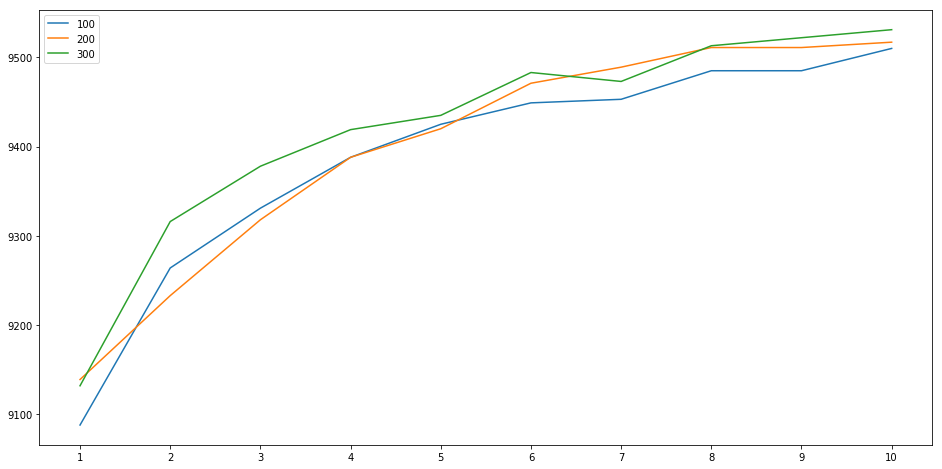

In [23]:
fig, ax = plt.subplots(figsize=(16, 8))
for validation_data_result, neurons_hidden_layer in zip(validation_data_results, neurons_hidden_layers):
    ax.plot(validation_data_result, label=str(neurons_hidden_layer))

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_xticks(np.arange(10))
ax.set_xticklabels(np.arange(10) + 1)
plt.show()

In [27]:
predictions

[9512.0, 9529.0, 9566.0]

<div class='alert alert-success'>
From the plots above we can see how the maximum accuracy is higher, the more neurons we have in our hidden layer, as expected. We can also see how the predictions on the test data are quite similar, although they follow the same increasing trend as the number of hidden neurons in the hidden layer increases.
</div>

<div class='alert alert-success'>
We are now going to compare the performance of the network with one hidden layer and two hidden layers both on the mnist data and the test images used in question 2.1.4.
</div>

<b> Question 2.2.5 : </b> Add one additionnal hidden layers and train your network, discuss your results with different setting. 



[ 1/50] Error: 0.16232	Training Acc.: 87.89	Validation Acc.: 88.78	Time: 17.61
[ 2/50] Error: 0.08966	Training Acc.: 90.71	Validation Acc.: 91.04	Time: 35.87
[ 3/50] Error: 0.07465	Training Acc.: 91.89	Validation Acc.: 91.88	Time: 54.31
[ 4/50] Error: 0.06657	Training Acc.: 92.71	Validation Acc.: 92.42	Time: 74.57
[ 5/50] Error: 0.06114	Training Acc.: 93.06	Validation Acc.: 92.68	Time: 95.01
[ 6/50] Error: 0.05723	Training Acc.: 93.68	Validation Acc.: 93.10	Time: 114.01
[ 7/50] Error: 0.05404	Training Acc.: 93.94	Validation Acc.: 93.20	Time: 134.80
[ 8/50] Error: 0.05135	Training Acc.: 94.21	Validation Acc.: 93.45	Time: 155.12
[ 9/50] Error: 0.04920	Training Acc.: 94.53	Validation Acc.: 93.64	Time: 174.53
[10/50] Error: 0.04717	Training Acc.: 94.84	Validation Acc.: 93.71	Time: 194.75
[11/50] Error: 0.04544	Training Acc.: 95.08	Validation Acc.: 93.94	Time: 212.06
[12/50] Error: 0.04392	Training Acc.: 95.14	Validation Acc.: 94.07	Time: 229.36
[13/50] Error: 0.04264	Training Acc.: 95.28	V

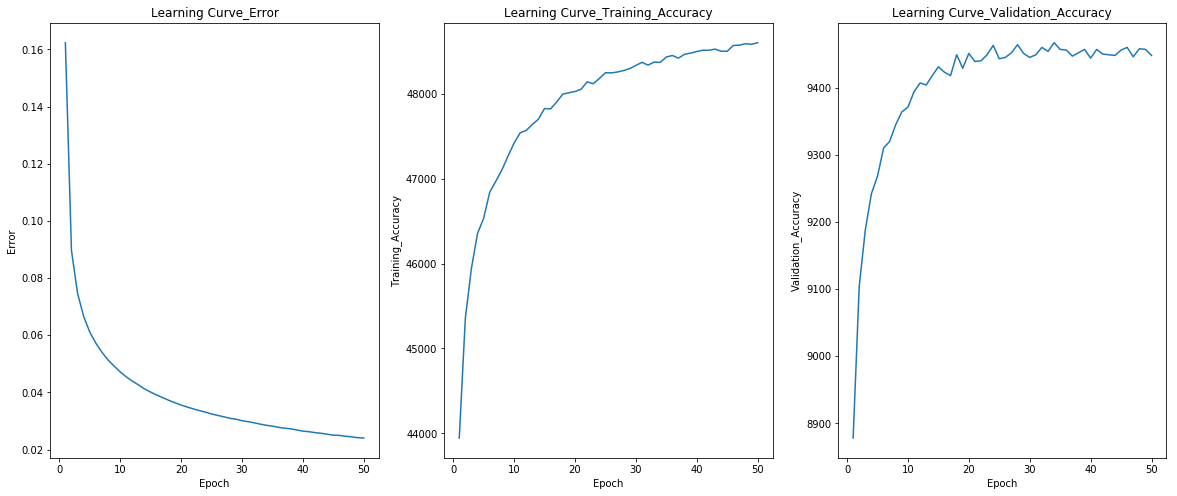

Test Accuracy 1 hidden layer 94.91


In [28]:
validation_data_results = []
iterations = 50

my_mnist_net_one_hidden = NeuralNetwork(784, 30, 10, iterations = iterations, learning_rate = 0.1)
# Train your network 
validation_data_results.append(my_mnist_net_one_hidden.train(training_data, validation_data))
test_accuracy = my_mnist_net_one_hidden.predict(test_data) / 100
print('Test Accuracy 1 hidden layer %-2.2f' % test_accuracy)

[ 1/50] Error: 0.27614	Training Acc.: 84.53	Validation Acc.: 85.47	Time: 23.75
[ 2/50] Error: 0.09738	Training Acc.: 89.98	Validation Acc.: 90.04	Time: 46.54
[ 3/50] Error: 0.07438	Training Acc.: 91.86	Validation Acc.: 91.49	Time: 68.46
[ 4/50] Error: 0.06427	Training Acc.: 92.85	Validation Acc.: 92.19	Time: 90.14
[ 5/50] Error: 0.05755	Training Acc.: 93.49	Validation Acc.: 92.50	Time: 111.83
[ 6/50] Error: 0.05270	Training Acc.: 93.82	Validation Acc.: 92.64	Time: 133.52
[ 7/50] Error: 0.04913	Training Acc.: 94.36	Validation Acc.: 93.02	Time: 155.22
[ 8/50] Error: 0.04644	Training Acc.: 94.96	Validation Acc.: 93.45	Time: 176.90
[ 9/50] Error: 0.04357	Training Acc.: 95.01	Validation Acc.: 93.61	Time: 198.81
[10/50] Error: 0.04156	Training Acc.: 95.24	Validation Acc.: 93.56	Time: 220.49
[11/50] Error: 0.03970	Training Acc.: 95.46	Validation Acc.: 93.53	Time: 242.14
[12/50] Error: 0.03810	Training Acc.: 95.59	Validation Acc.: 93.92	Time: 263.80
[13/50] Error: 0.03680	Training Acc.: 95.89	

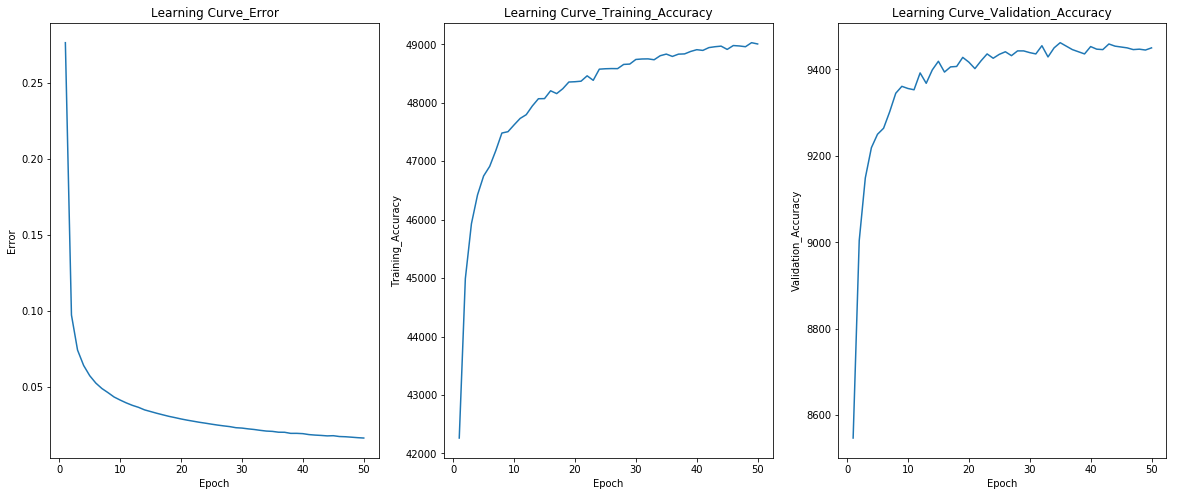

Test Accuracy 2 hidden layers 95.01


In [32]:
my_mnist_net_two_hidden = ModNeuralNetwork(784, 30, 30, 10, iterations = iterations, learning_rate = 0.1)
# Train your network 
validation_data_results.append(my_mnist_net_two_hidden.train(training_data, validation_data))
test_accuracy = my_mnist_net_two_hidden.predict(test_data) / 100
print('Test Accuracy 2 hidden layers %-2.2f' % test_accuracy)

<div class='alert alert-success'>
We can notice how the adding of one hidden layer does not really influence the performance of our network, given that both the Validation and Test Accuracy are almost the same.
<br>
<table>
<thead>
  <tr><th>N_hidden_layers</th><th>Validation_Accuracy</th><th>Test_Accuracy</th></tr>
</thead>
<tbody>
    <tr><th>1</th><th>94.489</th><th>4.91</th><tr>
    <tr><th>2</th><th>94.509</th><th>5.01</th><tr>
</tbody>
</table>
</div>

<div class='alert alert-success'>
We are now going to compare the results of the prediction of digits in the test_image folder.
</div>

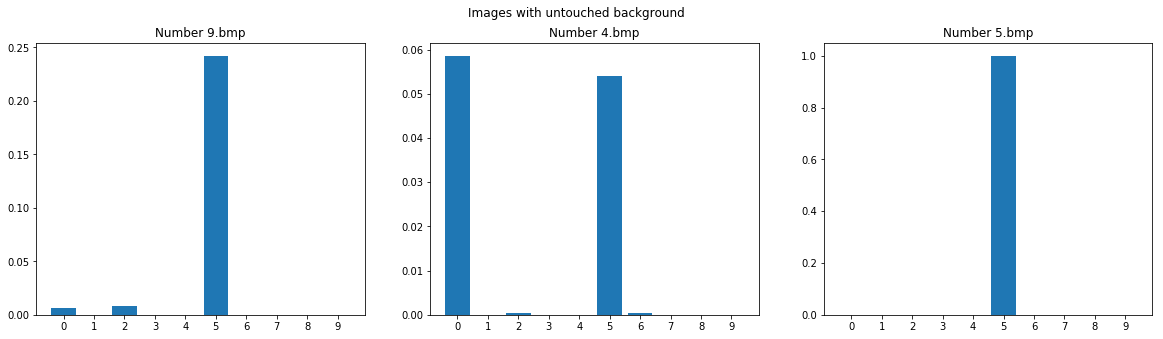

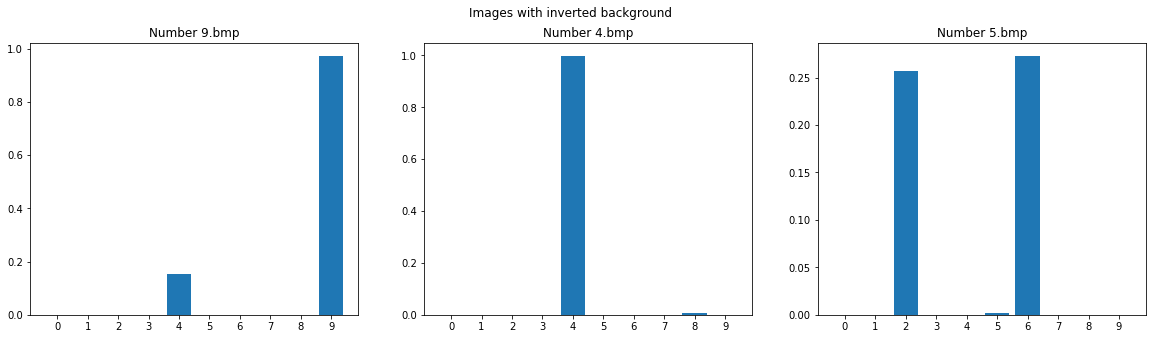

In [31]:
fig = plt.figure(figsize=(20, 5))
fig.suptitle('One hidden layer network on images')

# with normal background
count = 0
for number in images.keys():
    # print(image.flatten())
    result = my_mnist_net_one_hidden.feed_forward(images[number].flatten() / 255.0)
    plt.subplot(1, 3, count + 1)
    plt.title('Number %s' % number)
    plt.bar(np.arange(0, 10), result.flatten())
    plt.xticks(np.arange(0, 10))
    count += 1
    
fig.suptitle('Images with untouched background')
plt.show()

fig = plt.figure(figsize=(20, 5))
# with inverted background
count = 0
for number in images:
    # print(image.flatten())
    result = my_mnist_net_one_hidden.feed_forward(1 - (images[number].flatten() / 255.0))
    plt.subplot(1, 3, count + 1)
    plt.title('Number %s' % number)
    plt.bar(np.arange(0, 10), result.flatten())
    plt.xticks(np.arange(0, 10))
    count += 1

fig.suptitle('Images with inverted background')
plt.show()

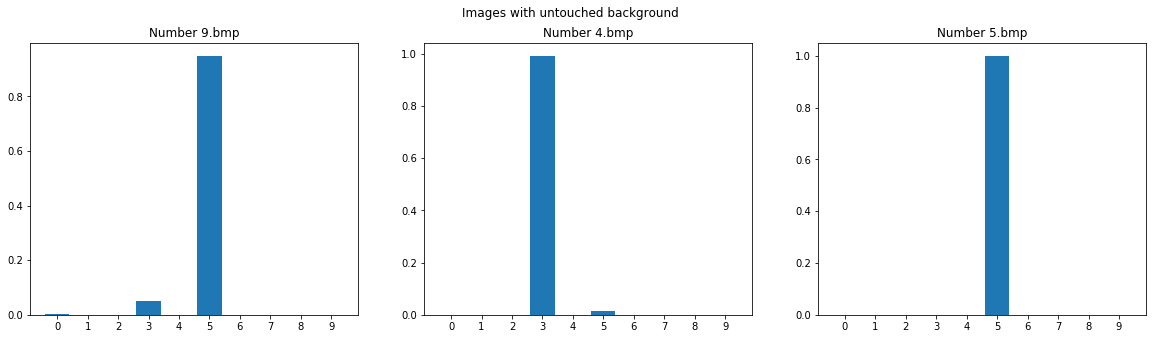

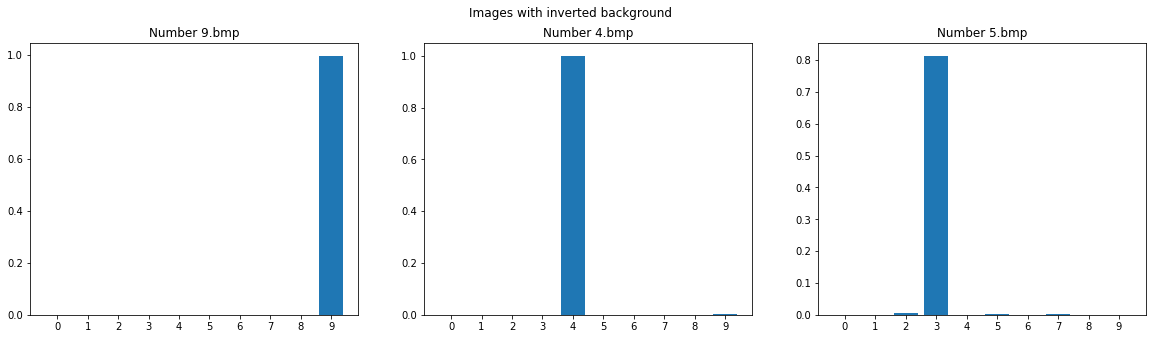

In [33]:
fig = plt.figure(figsize=(20, 5))
fig.suptitle('Two hidden layer network on images')

# with normal background
count = 0
for number in images.keys():
    # print(image.flatten())
    result = my_mnist_net_two_hidden.feed_forward(images[number].flatten() / 255.0)
    plt.subplot(1, 3, count + 1)
    plt.title('Number %s' % number)
    plt.bar(np.arange(0, 10), result.flatten())
    plt.xticks(np.arange(0, 10))
    count += 1
    
fig.suptitle('Images with untouched background')
plt.show()

fig = plt.figure(figsize=(20, 5))
# with inverted background
count = 0
for number in images:
    # print(image.flatten())
    result = my_mnist_net_two_hidden.feed_forward(1 - (images[number].flatten() / 255.0))
    plt.subplot(1, 3, count + 1)
    plt.title('Number %s' % number)
    plt.bar(np.arange(0, 10), result.flatten())
    plt.xticks(np.arange(0, 10))
    count += 1

fig.suptitle('Images with inverted background')
plt.show()

<div class='alert alert-success'>
As we can easily see, when using one hidden layer the predictions are more uncertain than when using a 2-hidden-layer network, but the difference is not that much.
</div>

<div class='alert alert-success'>
The figure below shows the comparison of validation accuracy with 1 and 2 hidden layers
</div>

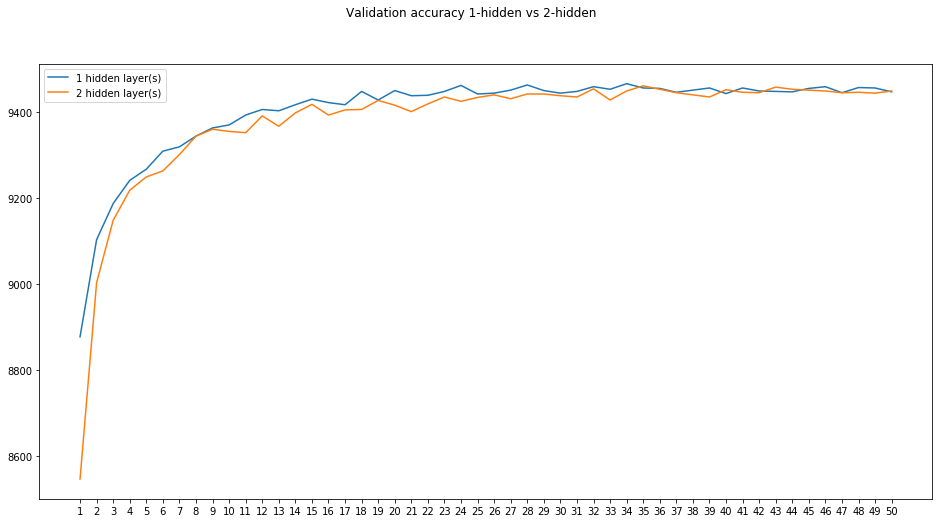

In [35]:
fig, ax = plt.subplots(figsize=(16, 8))
hidden_layers = 1

for validation_data_result in validation_data_results:
    ax.plot(validation_data_result, label='%d hidden layer(s)' % hidden_layers)
    hidden_layers += 1

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
fig.suptitle('Validation accuracy 1-hidden vs 2-hidden')
ax.set_xticks(np.arange(iterations))
ax.set_xticklabels(np.arange(iterations) + 1)
plt.show()

<div class='alert alert-success'>
The two networks perform similarly on the validation data and test data, with a slightly better result for the 1-layer network. This shows that is not always necessary to have more layers to have a higher accuracy, it all depends on the problem we are facing.
</div>